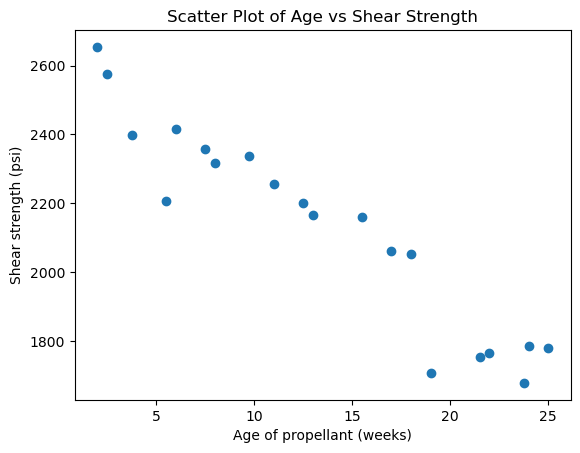

Least Squares Coefficients: Intercept = 2627.8495477253527, Slope = -37.15375474090577


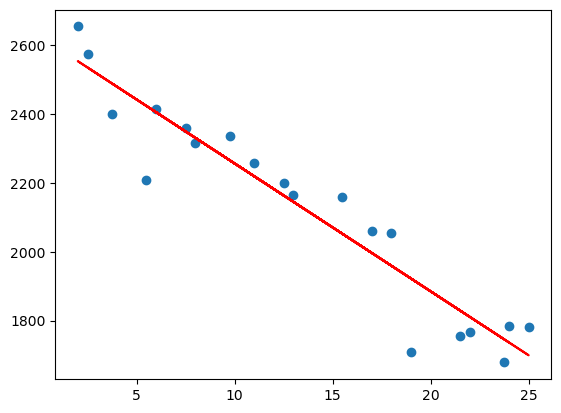

Gradient Descent Coefficients: Intercept = 2604.4180159312155, Slope = -35.81369165162217


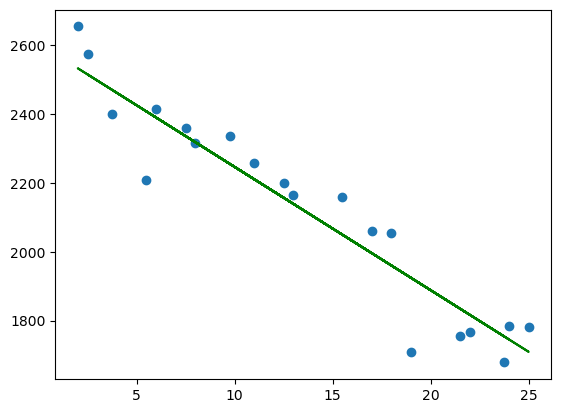

SGD Coefficients: Intercept = 2082.295527069595, Slope = -269.99965580555255


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


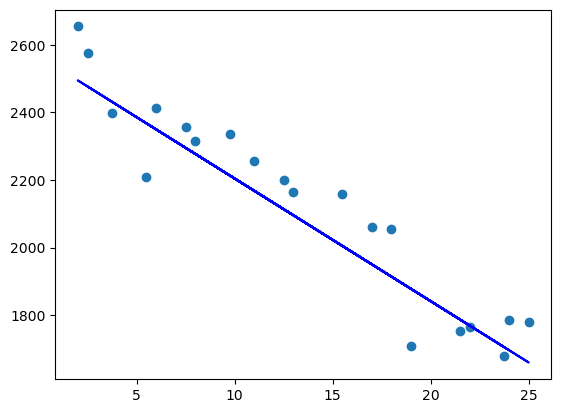

Mean Squared Error (Least Squares): 8313.773493028788
Mean Squared Error (Gradient Descent): 8443.654697090995
Mean Squared Error (Stochastic Gradient Descent): 10763.757484643469


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
data = {
    'x': [15.5, 23.75, 8.00, 17.00, 5.50, 19.00, 24.00, 2.50, 7.50, 11.00,
          13.00, 3.75, 25.00, 9.75, 22.00, 18.00, 6.00, 12.50, 2.00, 21.50],
    'y': [2158.70, 1678.15, 2316.00, 2061.30, 2207.50, 1708.30, 1784.70,
          2575.00, 2357.90, 2256.70, 2165.70, 2399.55, 1779.80, 2336.75,
          1765.30, 2053.50, 2414.40, 2200.50, 2654.20, 1753.70]
}
df = pd.DataFrame(data)
X = df['x'].values.reshape(-1, 1)
y = df['y'].values
plt.scatter(X, y)
plt.xlabel('Age of propellant (weeks)')
plt.ylabel('Shear strength (psi)')
plt.title('Scatter Plot of Age vs Shear Strength')
plt.show()
def least_squares(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return theta_best
theta_least_squares = least_squares(X, y)
print(f"Least Squares Coefficients: Intercept = {theta_least_squares[0]}, Slope = {theta_least_squares[1]}")
y_pred_least_squares = theta_least_squares[0] + theta_least_squares[1] * X.flatten()
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred_least_squares, color='red', label='Least Squares Fit')
plt.show()
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(2)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - learning_rate * gradients
        if np.isnan(theta).any():
            print("NaN encountered, stopping iterations.")
            break
    return theta
theta_gradient_descent = gradient_descent(X, y, learning_rate=0.001, n_iterations=10000)
print(f"Gradient Descent Coefficients: Intercept = {theta_gradient_descent[0]}, Slope = {theta_gradient_descent[1]}")
y_pred_gd = theta_gradient_descent[0] + theta_gradient_descent[1] * X.flatten()
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred_gd, color='green', label='Gradient Descent Fit')
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sgd_reg = SGDRegressor(max_iter=2000, tol=1e-3, eta0=0.001, random_state=42)
sgd_reg.fit(X_scaled, y)
theta_sgd = [sgd_reg.intercept_[0], sgd_reg.coef_[0]]
print(f"SGD Coefficients: Intercept = {theta_sgd[0]}, Slope = {theta_sgd[1]}")
y_pred_sgd = sgd_reg.predict(X_scaled)
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred_sgd, color='blue', label='SGD Fit')
plt.show()
mse_ls = mean_squared_error(y, y_pred_least_squares)
mse_gd = mean_squared_error(y, y_pred_gd)
mse_sgd = mean_squared_error(y, y_pred_sgd)
print(f"Mean Squared Error (Least Squares): {mse_ls}")
print(f"Mean Squared Error (Gradient Descent): {mse_gd}")
print(f"Mean Squared Error (Stochastic Gradient Descent): {mse_sgd}")

In [2]:
import pandas as pd
import statsmodels.api as sm


data = {
    "shear": [2160.70,1680.15,2318.00,2063.30,2209.50,1710.30,1786.70,2577.00,2359.90,2258.70,2167.20,2401.55,1781.80,2338.75,1767.30,2055.50,2416.40,2202.50,2656.20,1755.70],
    "age": [15.50, 23.75, 8.00, 17.00, 5.50, 19.00, 24.00, 2.50,7.50,11.00,13.00,3.75,25.00,9.75,22.00,18.00,6.00,12.50,2.00,21.50]
}

df = pd.DataFrame(data)


y = df['shear']
X = df['age']


X = sm.add_constant(X)


linear_regression = sm.OLS(y, X)
fitted_model = linear_regression.fit()


print(fitted_model.summary())


intercept = fitted_model.params['const']
slope = fitted_model.params['age']

print("\nIntercept:", intercept)
print("Slope:", slope)


                            OLS Regression Results                            
Dep. Variable:                  shear   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     165.4
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           1.64e-10
Time:                        12:02:54   Log-Likelihood:                -118.63
No. Observations:                  20   AIC:                             241.3
Df Residuals:                      18   BIC:                             243.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2629.8224     44.184     59.520      0.0